# Teacher Notes


## Lesson Outline
* Problem Statement (3 minutes)
    * Introduce the problem and direct students to take a few minutes to mull it over.
* Paired Discussions (5-10 minutes)
    * After giving students a few minutes to think on their own (where they can flesh out their own intuitions), have students pair up and discuss their thoughts. This provides an opportunity for student interaction and comparing/contrasting initial thoughts.
* Class Discussion
    * Bring the class back together and lead a discussion regarding various approaches to the problem.
    * Class survey (optional, but potentially a fun ice breaker activity) survey student's birthdays and see if there are any duplicates in the class. Alternatively, you can also facilitate this activity at the beginning of the lesson and ask students to try and silently line up in order of their birthday's from Jan 1st to Dec 31st.
    * Programming Simulation&mdash;move the discussion towards a programming mindset, probing students for how they could create a simulation to model this scenario. Some leading preliminary questions might include:
        * How can we represent a person's birthday? Which representation is easiest?
            * Possible answers include: MM-DD, Month Day, etc.
            * The easiest is actually probably simply a number 1-365 (or 366 if we include the possability of leap years)
        * How can we store these birthdays? (a list is most natural)
        * How can we check if we've already seen this birthday? (conditional if statement, list comprehension or loop)
        * How can we repeat this simulation to observe the probability?
        * How can we display this information?


## Materials

* Student version of this slide deck: The Birthday Problem

# The Birthday Problem

How many people do you need to have at least a 50% chance that 2 people have the same birthday? How many for an 80% chance? How many for a 100%?

## Teacher Notes

Work on building student's problems solving skills and introduce concepts like probability. One conceptual approach to the problem works person by person:

Guide students by asking questions such as:

* When the second person enters the room, what is the probability that they have the same birthday as the first person (1/366)
* What's the probability that they DON'T have the same birthday? (365/366)
    * Introduce the concept of a statistical compliment here.
* Assuming that the first two people didn't have the same birthday, what is the probability that the third person who enters has the same birthday as one of the first two who were already in the room?
(2/366)
    * What's the probability that they don't have the same birthday as either of the first two people? (364/366)
* How can we combine these probabilities to then determine the overall probability that no one has the same birthday out of a group of three people?
    * This should lead to a discussion of independent events and the fact that we can then multiply these probabilities to find the probability of the compound event: $\frac{365}{366} \cdot \frac{364}{366}$ However, further note that this is the probability of NOT having any same birthdays. To find the probability of having a shared birthday, we need to find the **compliment** of this event ($1- \frac{365}{366} \cdot \frac{364}{366}$)
* Assuming the first three people didnt have the same birthday, what is the probability that the fourth person has the same birthday as one of these three? (3/366)
* What is the combined probability that there is a birthday match in a group of four people?

> Note: The denominators above are 366 to include leap years. Feel free to discuss 365 if you prefer.

* How many people do you need to have a 50% chance that 2 people have the same birthday?
* How could we use python to express this?


In [1]:
# Teacher Notes
# Iteration 1: the most primitive solution; still requires some guess and checking to find the appropriate group size
number_students = 24
prob_no_matches = 1
for i in range(2,number_students):
    numerator = 366 - (i-1)
    denominator = 366
    prob_no_matches *= (numerator/denominator)
positive_prob =  1- prob_no_matches
print("The probability that there is a shared birthday in a group of {} people is: {}".format(number_students, positive_prob))

The probability that there is a shared birthday in a group of 24 people is: 0.5063230118194602


## Teacher Notes:

Present the first solution above, or lead students through its creation.
Then ask how could we adapt this so that we don't need to use guess and check?

In [2]:


# A: Use a while clause:

threshold = 1
prob_no_matches = 1
positive_prob = 0
number_students = 2
while positive_prob < threshold:
    numerator = 366 - (number_students - 1)
    denominator = 366
    prob_no_matches *= (numerator/denominator)
    number_students += 1
    positive_prob = 1 - prob_no_matches
print("To achieve a {} probability, you need a group of {} people.".format(threshold, number_students))
print("The probability that there is a shared birthday in a group of {} people is: {}".format(number_students, positive_prob))

#This particular case of 1 can also lead to an interesting potential discussion of rounding errors, to truly achieve certainty we would need 367 individuals.
#Although, having every unique birthday covered birthday with no matches is a preposterously rare event by random chance alone.
#Classically, this is known as the pigeon hole problem (You need a pigeon to fill all the holes before you can be guaranteed that two pigeons share a nest.)

To achieve a 1 probability, you need a group of 155 people.
The probability that there is a shared birthday in a group of 155 people is: 1.0


Text(0,0.5,'Probability of Shared Birthday')

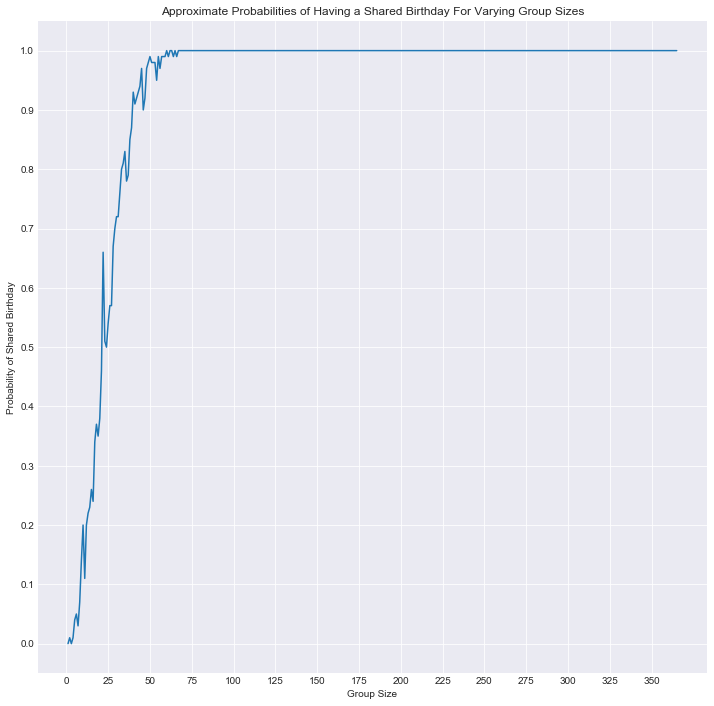

In [3]:
# Teacher Notes

# This solution preview several aspects that will be foreign to students including numpy.
# Nonetheless, the preview may help frontload concepts to be introduced in the near future.
# This may be appropriate to also save for later once students have developed more skills and can revisit the problem with that new toolset.
# Advanced  solution:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

group_sizes = range(1,366)
group_probs = []
#Explore various group sizes
for group_size in group_sizes:
    #Simulate 100 random scenarios to estimate the probability
    has_duplicates = 0
    for simN in range(100):
        birthdays = np.random.choice(range(1,366), group_size)
        if len(set(birthdays)) != len(birthdays):
            has_duplicates += 1
    prob = has_duplicates / 100 #Set the estimated probability for the group size 
    group_probs.append(prob)
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.plot(group_sizes, group_probs)
plt.title("Approximate Probabilities of Having a Shared Birthday For Varying Group Sizes")
plt.xlabel('Group Size')
plt.yticks([i/10 for i in range(11)])
plt.xticks(range(0, 375, 25))
plt.ylabel('Probability of Shared Birthday')